# Aprendizaje Maquinal [ Proyecto Final ]

#### Integrantes: 
#####     --> Arzola Perez Armando
#####     --> Clavel Ojeda Karla Paola
#####     --> Santiago Valdes Yessica Fabiola



---

###     Analisis exploratorio de datos
##### Competencia: CHILD MIND INSTITURE - DETECT SLEEP STATES

---

##### Librerias

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pylab as plt
import matplotlib.pylab as plt

#### Entender las variables

In [25]:
# Lectura del conjunto de datos de prueba
df = pd.read_csv("sample_submission.csv")

In [26]:
# Número de renglones y columnas
df.shape

(6, 5)

###### Este conjunto de datos es una prueba con 5 elementos solo para probar como estan seccionados.

In [27]:
# Primeros 5 elementos
df.head(6)

,row_id,series_id,step,event,score
0,0,038441c925bb,100,onset,0.0
1,1,038441c925bb,105,wakeup,0.0
2,2,03d92c9f6f8a,80,onset,0.5
3,3,03d92c9f6f8a,110,wakeup,0.5
4,4,0402a003dae9,90,onset,1.0
5,5,0402a003dae9,120,wakeup,1.0


In [28]:
# Lectura del conjunto de datos
df = pd.read_csv("train_events.csv")

In [29]:
# Número de renglones y columnas
df.shape

(14508, 5)

In [30]:
# Nombres de las columnas    
df.columns

Index(['series_id', 'night', 'event', 'step', 'timestamp'], dtype='object')

In [31]:
# Primeros 5 elementos
df.head()

,series_id,night,event,step,timestamp
0,038441c925bb,1,onset,4992.0,2018-08-14T22:26:00-0400
1,038441c925bb,1,wakeup,10932.0,2018-08-15T06:41:00-0400
2,038441c925bb,2,onset,20244.0,2018-08-15T19:37:00-0400
3,038441c925bb,2,wakeup,27492.0,2018-08-16T05:41:00-0400
4,038441c925bb,3,onset,39996.0,2018-08-16T23:03:00-0400


In [32]:
# Datos únicos
df.nunique(axis=0)

series_id     277
night          84
event           2
step         7499
timestamp    9360
dtype: int64

In [33]:
# Cambiar los datos de event onset(inicio) y wakeup(despertar)
df["event"] = df["event"].replace(
    { "onset": 0, "wakeup": 1 }
)

In [34]:
# Datos estadisticos
df.describe()

,night,event,step
count,14508.000000,14508.000000,9585.000000
mean,15.120072,0.500000,214352.123944
std,10.286758,0.500017,141268.408192
min,1.000000,0.000000,936.000000
25%,7.000000,0.000000,95436.000000
50%,14.000000,0.500000,200604.000000
75%,21.000000,1.000000,317520.000000
max,84.000000,1.000000,739392.000000


In [35]:
df.describe().apply(lambda s: s.apply(lambda x: format(x, 'f')))


,night,event,step
count,14508.000000,14508.000000,9585.000000
mean,15.120072,0.500000,214352.123944
std,10.286758,0.500017,141268.408192
min,1.000000,0.000000,936.000000
25%,7.000000,0.000000,95436.000000
50%,14.000000,0.500000,200604.000000
75%,21.000000,1.000000,317520.000000
max,84.000000,1.000000,739392.000000


#### Limpieza de datos

In [36]:
# Valores NaN contados de cada atributo
df.isna().sum()

series_id       0
night           0
event           0
step         4923
timestamp    4923
dtype: int64

In [37]:
# Devuelve un número de valores únicos
df.nunique(axis = 0)

series_id     277
night          84
event           2
step         7499
timestamp    9360
dtype: int64

In [38]:
df_cleaned = df.copy()

In [39]:
df.head()

,series_id,night,event,step,timestamp
0,038441c925bb,1,0,4992.0,2018-08-14T22:26:00-0400
1,038441c925bb,1,1,10932.0,2018-08-15T06:41:00-0400
2,038441c925bb,2,0,20244.0,2018-08-15T19:37:00-0400
3,038441c925bb,2,1,27492.0,2018-08-16T05:41:00-0400
4,038441c925bb,3,0,39996.0,2018-08-16T23:03:00-0400


In [40]:
# Eliminar las columnas que no proporcionan información relevante
# df_cleaned = df_cleaned.copy().drop(['series_id'], axis=1)
# df_cleaned = df_cleaned.copy().drop(['timestamp'], axis=1)

In [41]:
# Nombre de las columnas
df_cleaned.columns

Index(['series_id', 'night', 'event', 'step', 'timestamp'], dtype='object')

In [42]:
# Eliminar las columnas con NaN
df_cleaned = df_cleaned.dropna()

In [43]:
df_cleaned.isnull().sum()

series_id    0
night        0
event        0
step         0
timestamp    0
dtype: int64

In [44]:
# Número de renglones y columnas
df_cleaned.shape

(9585, 5)

#### Analisis de relaciones entre variables 

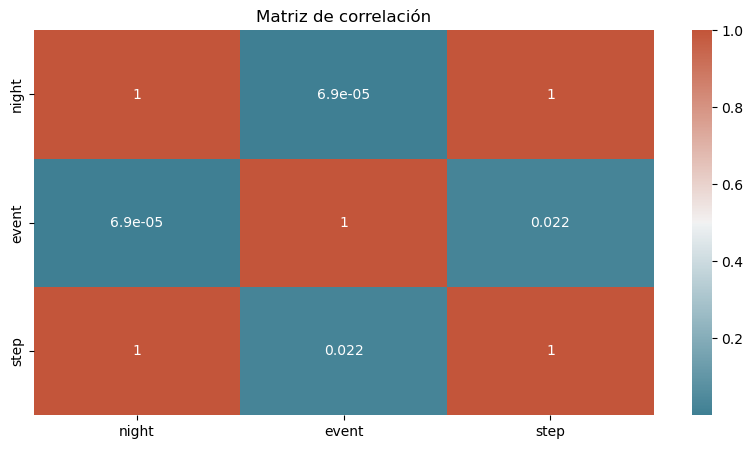

In [45]:
corr = df_cleaned.corr(numeric_only=True)
plt.figure(figsize=(10, 5))
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
plt.title("Matriz de correlación")
plt.show()

<AxesSubplot:>

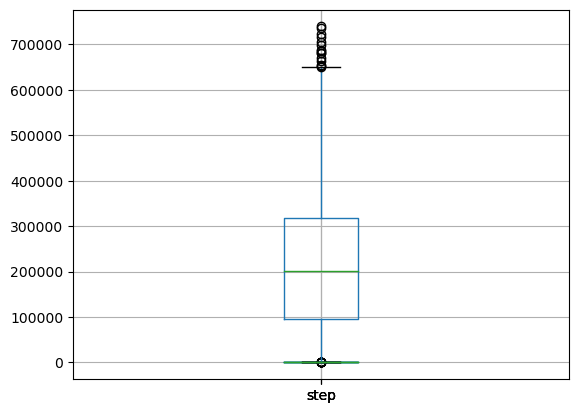

In [46]:
df_cleaned.boxplot('night')
df_cleaned.boxplot('event')
df_cleaned.boxplot('step')